# Merit Award Project

## Setup

In [21]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.mixture import GaussianMixture

### Load Data

In [22]:
data = load_breast_cancer()
X = data.data
y = data.target


### Split Data

In [23]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


### Scale Data

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Exercise 1 

In [25]:
logistic_reg = LogisticRegression(random_state=42, max_iter=3000)
logistic_reg.fit(X_train, y_train)

logistic_reg_scaled = LogisticRegression(random_state=42, max_iter=3000)
logistic_reg_scaled.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=3000, random_state=42)

In [26]:
test_acc = logistic_reg.score(X_test, y_test)
train_acc = logistic_reg.score(X_train, y_train)
print(f"Unscaled Test Accuracy {test_acc*100:.2f}%")
print(f"Unscaled Train Accuracy {train_acc*100:.2f}%")

test_acc_scaled  = logistic_reg_scaled.score(X_test_scaled, y_test)
train_acc_scaled = logistic_reg_scaled.score(X_train_scaled, y_train)
print(f"Scaled Test Accuracy {test_acc_scaled*100:.2f}%")
print(f"Scaled Train Accuracy {train_acc_scaled*100:.2f}%")

Unscaled Test Accuracy 97.66%
Unscaled Train Accuracy 95.98%
Scaled Test Accuracy 98.25%
Scaled Train Accuracy 98.74%


# Exercise 2

In [27]:
k_range = list(range(2, 11))
train_silhouette_scores = list()
test_silhouette_scores = list()
em_model_per_k = list()

for k in k_range:
    em_model = GaussianMixture(n_components=k, random_state=10)
    em_model.fit(X_train)
    train_labels = em_model.predict(X_train)
    test_labels = em_model.predict(X_test)

    # Calculate silhouette score
    train_silhouette = silhouette_score(X_train, train_labels)
    test_silhouette = silhouette_score(X_test, test_labels)

    train_silhouette_scores.append(train_silhouette)
    test_silhouette_scores.append(test_silhouette)

    em_model_per_k.append(em_model)

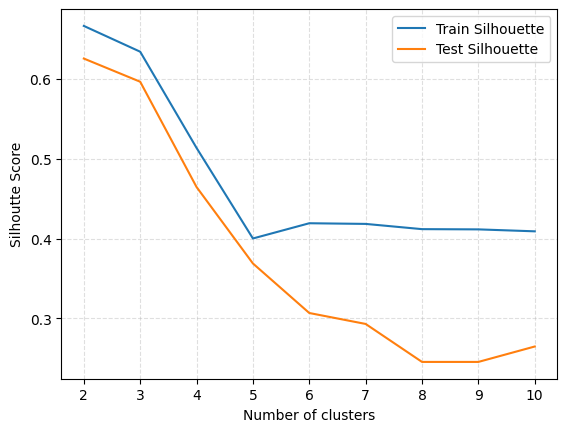

In [28]:
plt.plot(k_range, train_silhouette_scores, label="Train Silhouette")
plt.plot(k_range, test_silhouette_scores, label="Test Silhouette")
plt.legend()
plt.grid(alpha=0.4, which="both", linestyle="--")
plt.xlabel("Number of clusters")
plt.ylabel("Silhoutte Score")
plt.show()

In [29]:
print(f"Best Test Silhouette: {max(test_silhouette_scores):.3f}")
print(f"Best Train Silhouette: {max(train_silhouette_scores):.3f}")

Best Test Silhouette: 0.626
Best Train Silhouette: 0.667


In [30]:
optimal_k = k_range[test_silhouette_scores.index(max(test_silhouette_scores))]
print(f"The Optimal K for the EM clustering algorithm is {optimal_k}")

The Optimal K for the EM clustering algorithm is 2


# Exercise 3

In [31]:
test_probas_per_k = []

for em_model in em_model_per_k:
    test_probas_per_k.append(em_model.predict_proba(X_test))


# Exercise 4

In [32]:
train_accuracies = list()
test_accuracies = list()

for test_probas in test_probas_per_k:
    lr = LogisticRegression(random_state=10)
    lr.fit(test_probas, y_test)
    y_pred = lr.score(test_probas, y_test)
    test_accuracies.append(y_pred)
    

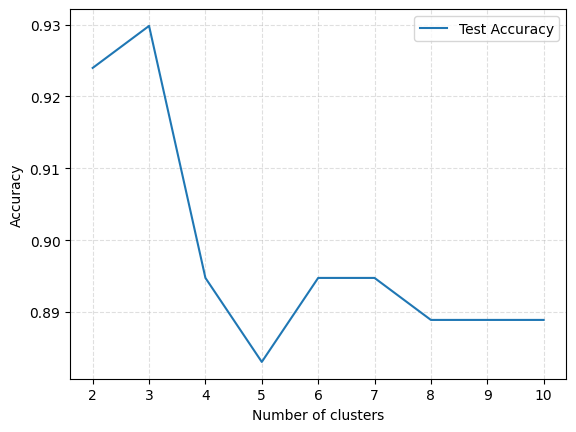

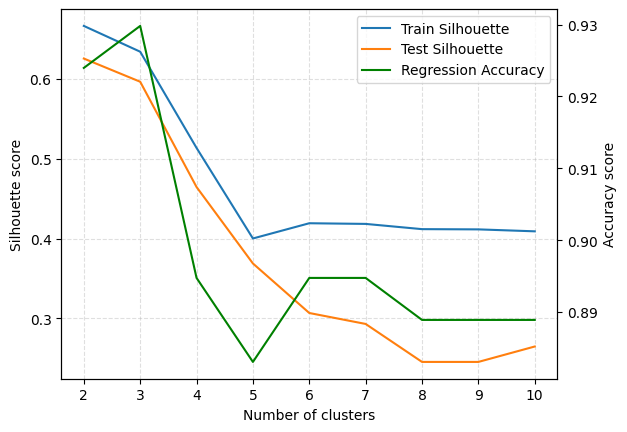

In [33]:
plt.plot(k_range, test_accuracies, label="Test Accuracy")
plt.legend()
plt.grid(alpha=0.4, which="both", linestyle="--")
plt.xlabel("Number of clusters")
plt.ylabel("Accuracy")
plt.show()

figure, ax1 = plt.subplots()
line1, = ax1.plot(k_range, train_silhouette_scores)
line2, = ax1.plot(k_range, test_silhouette_scores)
ax1.set_ylabel('Silhouette score')
ax1.set_xlabel('Number of clusters') 

ax2 = ax1.twinx()
line3, = ax2.plot(k_range, test_accuracies, label="Regression Accuracy", color="green")
ax2.set_ylabel('Accuracy score')
ax1.grid(alpha=0.4, which="major", linestyle="--")
ax1.legend([line1, line2, line3], ["Train Silhouette", "Test Silhouette", "Regression Accuracy"])
plt.show()


Logistic Regression score with the optimal k = 2 

In [34]:
print(f"Test accuracy of the k={optimal_k} model: {test_accuracies[k_range.index(optimal_k)]*100:.2f}%")

Test accuracy of the k=2 model: 92.40%


In [35]:
len(X[0])

30

~~Upon analyzing the relationship between the number of clusters (k) and both performance metrics, the Silhouette scores and Logistic Regression accuracy on the mapped dataset, there notable correlation in their behavior. The two metrics demonstrate similar trajectories, suggesting that the quality of clustering, as measured by the Silhouette score, directly influences the subsequent classification performance. Most significantly, both metrics show high values at k=2 and k=3, followed by a sharp decline as k increases. This sharp decline beyond k=3 indicates that additional clusters are likely to be unnecessary, theerefore leading to lower silhouette scores and classification accuracy. Using k=2 or k=3 the EM algorithm effectively serves as a dimensionality reduction technique, transforming the original high-dimensional feature space (30 features) into a lower dimensional feature space, while maintaining a high accuracy on the logistic regression.~~

Upon analyzing the relationship between the number of clusters ($k$) and both performance metrics - the Silhouette scores and Logistic Regression accuracy on the mapped dataset - we can see that there is a notable relation: For low numbers of clusters, such as 2 and 3, both metrics show high values, and as the $k$ increases, there is a sharp decline in both the silhouette score and the classification accuracy of the logistic model, which seem to follow the same trajectory, suggesting that a higher quality of clustering, as measured by the Silhouette score, is conducive to a better logistic regression model.
Using $k=2$ or $k=3$ the EM algorithm effectively serves as a dimensionality reduction technique, transforming the original high-dimensional feature space (30 features) into a lower dimensional feature space ($k$), while maintaining a high accuracy on the logistic regression model.

# 5

The rbf network typically consists of 3 layers, the input layer,  a hidden layer with a non-linear RBF activation function and a linear output layer. Sklearn's MLPs doesn't have the kind of activation for rbf, so the following will convert the dataset to rbf features and then train a MLPRegressor corresponding to the output layer

We will use the mean centroids of each cluster (k=2) and the most popular kind of rbf: Gaussian rbf to perform a classification on the mapped dataset

### Obtain Optimal model with k=2

In [36]:
optimal_k = 2
optimal_em_model: GaussianMixture = em_model_per_k[k_range.index(optimal_k)]

### Train rbf network
Gaussian function, with different gamma values

In [37]:
k = optimal_k
gammas = [x/1000 for x in range(1, 501)]

rbf_functions = {
  "Gaussian": lambda gamma, distance: np.exp(-gamma*distance),
  "Linear": lambda gamma, distance: -gamma*distance,
  "Inverse quadratic": lambda gamma, distance: 1/(1+gamma**2*distance),
  "Inverse multiquadric": lambda gamma, distance: 1/np.sqrt(1+gamma**2*distance)
}
rbf_test_accuracies = {key: [] for key in rbf_functions.keys()}
rbf_train_accuracies = {key: [] for key in rbf_functions.keys()}
X_rbf_list = []

for rbf in rbf_functions.keys():
  for gamma in gammas:
    em_model = em_model_per_k[k_range.index(k)]
    def get_rbf(X_old):
      X_new = []
      for x_t in X_old:
        new_x = []
        for means, covar_inv in zip(em_model.means_, em_model.precisions_):
          distance = np.transpose(x_t - means) @ covar_inv @ (x_t - means)
          new_x.append(rbf_functions[rbf](gamma, distance))
        X_new.append(new_x)
      return np.array(X_new)

    X_train_rbf = get_rbf(X_train)
    if rbf == "Gaussian":
      X_rbf_list.append(X_train_rbf)
    X_test_rbf  = get_rbf(X_test)

    rbf_network = LogisticRegression(random_state=42, max_iter=10000)
    rbf_network.fit(X_train_rbf, y_train)
    rbf_train_accuracies[rbf].append(rbf_network.score(X_train_rbf, y_train))
    rbf_test_accuracies[rbf].append(rbf_network.score(X_test_rbf, y_test))


Best gamma for Gaussian: 0.015
Test accuracy: 92.40%
Test accuracy for Gamma=0.5: 63.16%


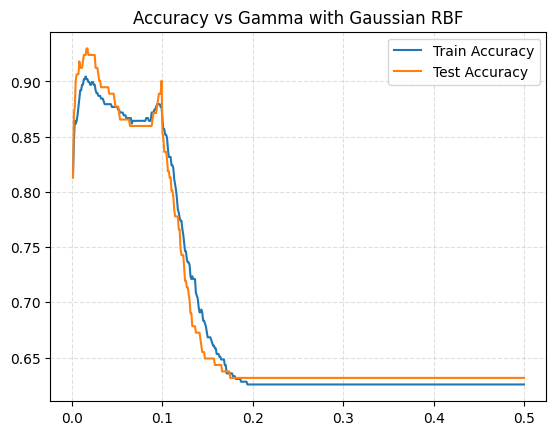

Best gamma for Linear: 0.04
Test accuracy: 93.57%
Test accuracy for Gamma=0.5: 92.40%


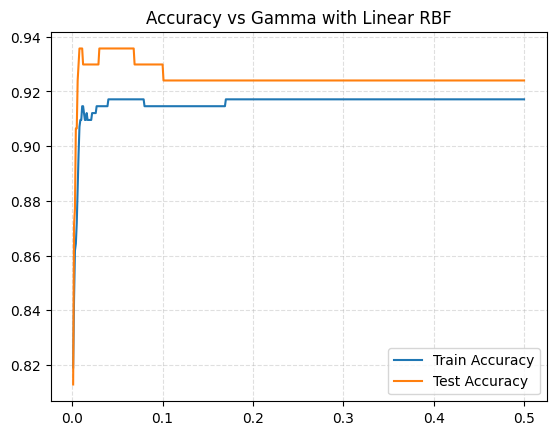

Best gamma for Inverse quadratic: 0.179
Test accuracy: 92.98%
Test accuracy for Gamma=0.5: 90.64%


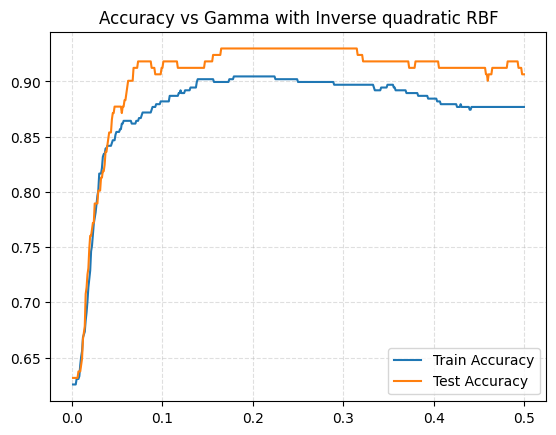

Best gamma for Inverse multiquadric: 0.243
Test accuracy: 92.40%
Test accuracy for Gamma=0.5: 91.81%


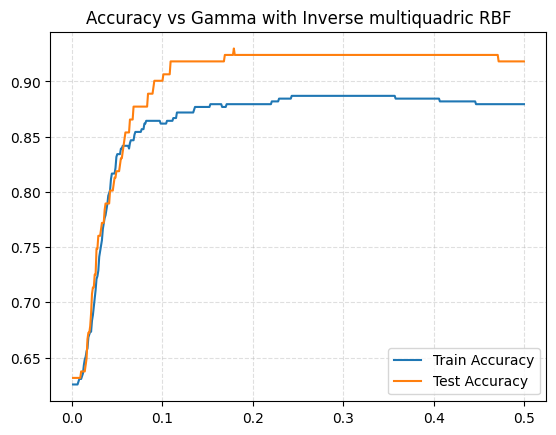

In [45]:
for rbf in filter(lambda k : len(rbf_train_accuracies[k]) > 0, rbf_train_accuracies.keys()):
  plt.plot(gammas, rbf_train_accuracies[rbf], label="Train Accuracy")
  plt.plot(gammas, rbf_test_accuracies[rbf], label="Test Accuracy")
  plt.legend()
  plt.title(f"Accuracy vs Gamma with {rbf} RBF")
  print(f"Best gamma for {rbf}: {gammas[rbf_train_accuracies[rbf].index(max(rbf_train_accuracies[rbf]))]}")
  print(f"Test accuracy: {rbf_test_accuracies[rbf][rbf_train_accuracies[rbf].index(max(rbf_train_accuracies[rbf]))]*100:.2f}%")
  print(f"Test accuracy for Gamma=0.5: {rbf_test_accuracies[rbf][gammas.index(0.5)]*100:.2f}%")
  plt.grid(alpha=0.4, which="both", linestyle="--")
  plt.show()
  max(X_train_rbf.flatten())

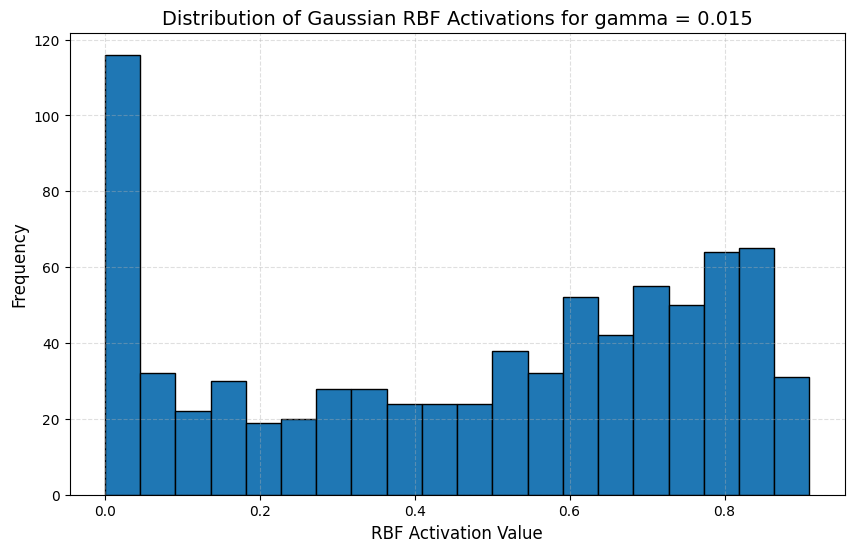

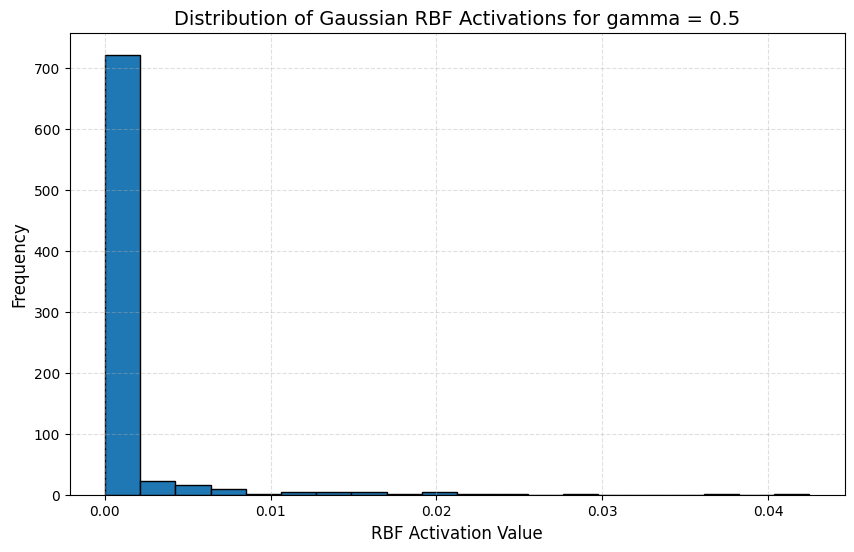

In [47]:
plt.figure(figsize=(10, 6))
plt.hist(X_rbf_list[gammas.index(0.015)].flatten(), bins=20, edgecolor='black')
plt.title('Distribution of Gaussian NRBF Activations for gamma = 0.015', fontsize=14)
plt.xlabel('RBF Activation Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.4, which="both", linestyle="--")

plt.figure(figsize=(10, 6))
plt.hist(X_rbf_list[gammas.index(0.5)].flatten(), bins=20, edgecolor='black')
plt.title('Distribution of Gaussian NRBF Activations for gamma = 0.5', fontsize=14)
plt.xlabel('RBF Activation Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.4, which="both", linestyle="--")

plt.show()

In [40]:
rbf_test_accuracies[rbf][499]

0.9181286549707602

### Normalized RBF (NRBF)

In [41]:
k = optimal_k

n_test_accuracies = {key: [] for key in rbf_functions.keys()}
n_train_accuracies = {key: [] for key in rbf_functions.keys()}
n_X_rbf_list = []
for rbf in rbf_functions.keys():
  for gamma in gammas:
    em_model = em_model_per_k[k_range.index(k)]
    def get_rbf(X_old):
      X_new = []
      for x_t in X_old:
        new_x = []
        for means, covar_inv in zip(em_model.means_, em_model.precisions_):
          distance = np.transpose(x_t - means) @ covar_inv @ (x_t - means)
          new_x.append(rbf_functions[rbf](gamma, distance))
        X_new.append(np.array(new_x)/sum(new_x))
      return np.array(X_new)

    X_train_rbf = get_rbf(X_train)
    if rbf == "Gaussian":
      n_X_rbf_list.append(X_train_rbf)
    X_test_rbf  = get_rbf(X_test)

    rbf_network = LogisticRegression(random_state=42, max_iter=10000)
    rbf_network.fit(X_train_rbf, y_train)
    n_train_accuracies[rbf].append(rbf_network.score(X_train_rbf, y_train))
    n_test_accuracies[rbf].append(rbf_network.score(X_test_rbf, y_test))


Best gamma for Gaussian: 0.036
Test accuracy for Gamma=0.036: 92.98%
Test accuracy for Gamma=0.5: 92.98%


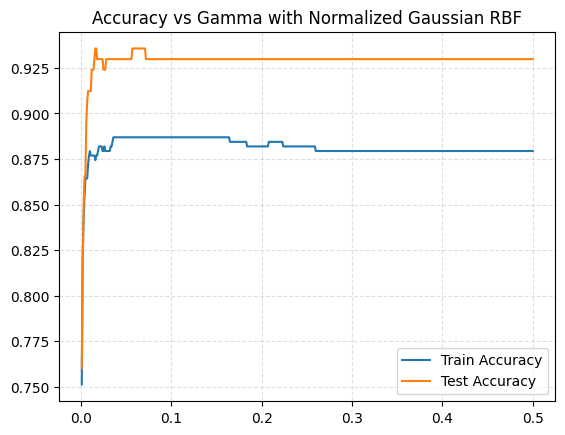

Best gamma for Linear: 0.001
Test accuracy for Gamma=0.001: 93.57%
Test accuracy for Gamma=0.5: 93.57%


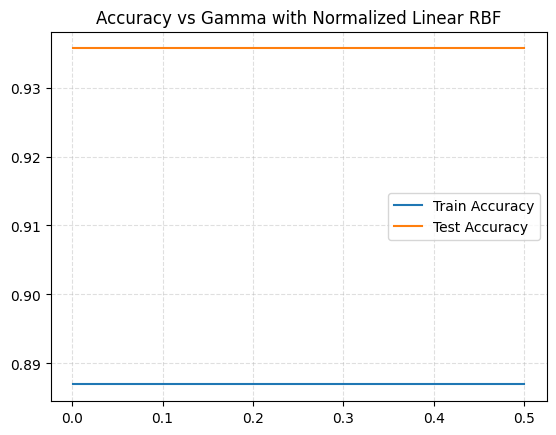

Best gamma for Inverse quadratic: 0.478
Test accuracy for Gamma=0.478: 92.98%
Test accuracy for Gamma=0.5: 93.57%


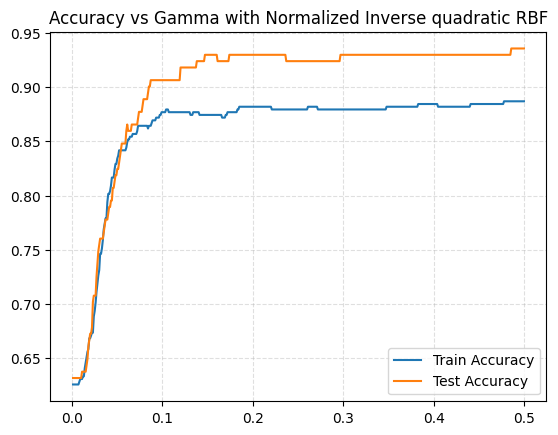

Best gamma for Inverse multiquadric: 0.162
Test accuracy for Gamma=0.162: 90.64%
Test accuracy for Gamma=0.5: 92.40%


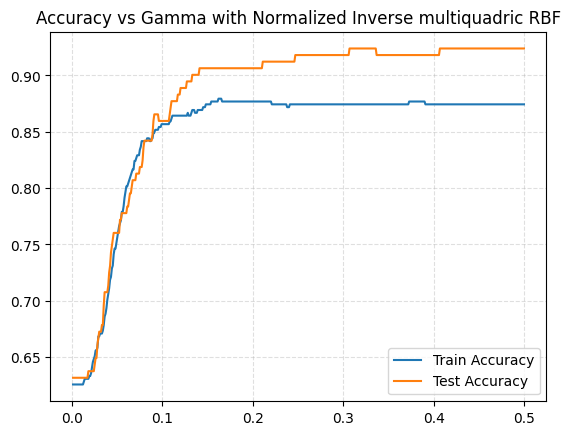

In [42]:
for rbf in filter(lambda k : len(n_train_accuracies[k]) > 0, n_train_accuracies.keys()):
  plt.plot(gammas, n_train_accuracies[rbf], label="Train Accuracy")
  plt.plot(gammas, n_test_accuracies[rbf], label="Test Accuracy")
  plt.legend()
  plt.title(f"Accuracy vs Gamma with Normalized {rbf} RBF")
  print(f"Best gamma for {rbf}: {gammas[n_train_accuracies[rbf].index(max(n_train_accuracies[rbf]))]}")
  print(f"Test accuracy for Gamma={gammas[n_train_accuracies[rbf].index(max(n_train_accuracies[rbf]))]}: {n_test_accuracies[rbf][n_train_accuracies[rbf].index(max(n_train_accuracies[rbf]))]*100:.2f}%")
  print(f"Test accuracy for Gamma=0.5: {n_test_accuracies[rbf][gammas.index(0.5)]*100:.2f}%")
  plt.grid(alpha=0.4, which="both", linestyle="--")
  plt.show()
  max(X_train_rbf.flatten())

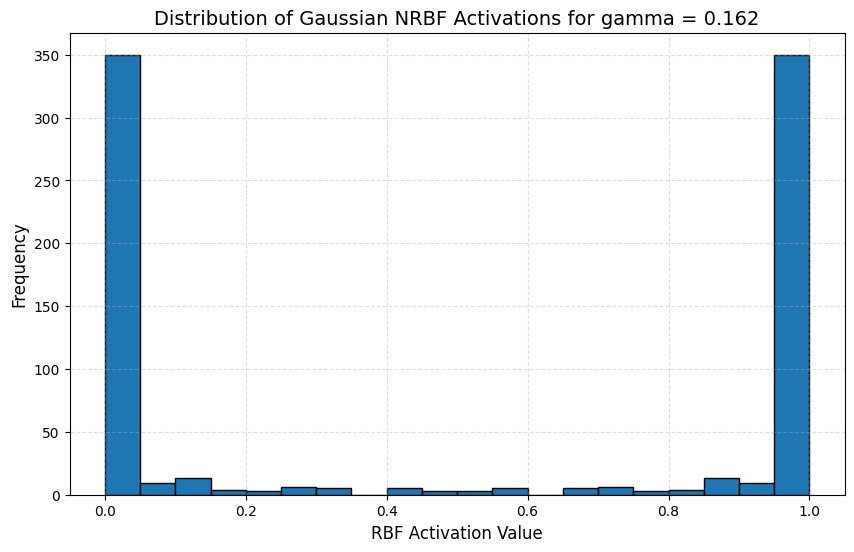

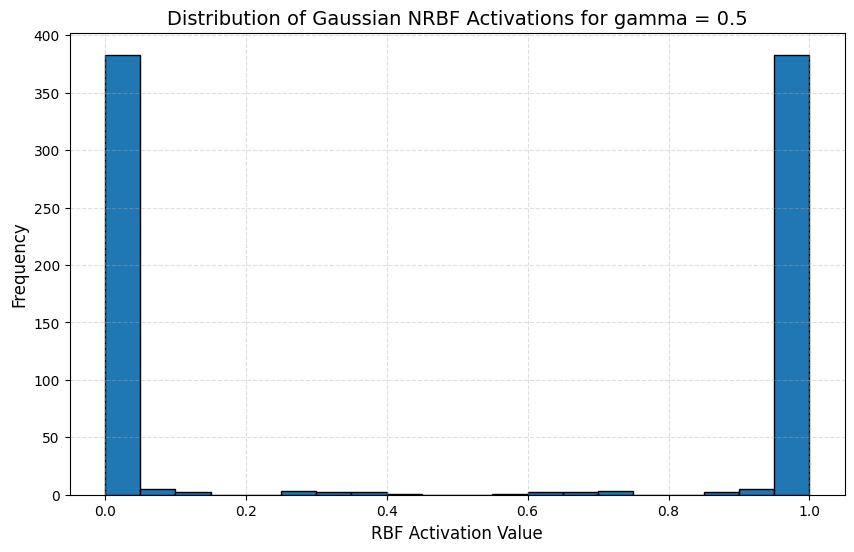

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(n_X_rbf_list[gammas.index(gammas[n_train_accuracies[rbf].index(max(n_train_accuracies[rbf]))])].flatten(), bins=20, edgecolor='black')
plt.title(f'Distribution of Gaussian NRBF Activations for gamma = {gammas[n_train_accuracies[rbf].index(max(n_train_accuracies[rbf]))]}', fontsize=14)
plt.xlabel('RBF Activation Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.4, which="both", linestyle="--")

plt.figure(figsize=(10, 6))
plt.hist(n_X_rbf_list[gammas.index(0.5)].flatten(), bins=20, edgecolor='black')
plt.title('Distribution of Gaussian NRBF Activations for gamma = 0.5', fontsize=14)
plt.xlabel('RBF Activation Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.4, which="both", linestyle="--")

plt.show()

In [49]:
print(f"Baseline Logistic Regression: {test_acc*100:.2f}%")
print(f"Logistic Regression on transformed features (k={optimal_k}): {test_accuracies[k_range.index(optimal_k)]*100:.2f}%")
for rbf in filter(lambda k : len(rbf_train_accuracies[k]) > 0, rbf_train_accuracies.keys()):
  print(f"\n{rbf} RBF Network gamma=0.5: {rbf_test_accuracies[rbf][gammas.index(0.5)]*100:.2f}%")
  print(f"{rbf} RBF Network gamma={gammas[rbf_train_accuracies[rbf].index(max(rbf_train_accuracies[rbf]))]}: {rbf_test_accuracies[rbf][rbf_train_accuracies[rbf].index(max(rbf_train_accuracies[rbf]))]*100:.2f}%")

  print(f"{rbf} NRBF Network gamma=0.5: {n_test_accuracies[rbf][gammas.index(0.5)]*100:.2f}%")
  print(f"{rbf} NRBF Network gamma={gammas[n_train_accuracies[rbf].index(max(n_train_accuracies[rbf]))]}: {n_test_accuracies[rbf][n_train_accuracies[rbf].index(max(n_train_accuracies[rbf]))]*100:.2f}%")




Baseline Logistic Regression: 97.66%
Logistic Regression on transformed features (k=2): 92.40%

Gaussian RBF Network gamma=0.5: 63.16%
Gaussian RBF Network gamma=0.015: 92.40%
Gaussian NRBF Network gamma=0.5: 92.98%
Gaussian NRBF Network gamma=0.036: 92.98%

Linear RBF Network gamma=0.5: 92.40%
Linear RBF Network gamma=0.04: 93.57%
Linear NRBF Network gamma=0.5: 93.57%
Linear NRBF Network gamma=0.001: 93.57%

Inverse quadratic RBF Network gamma=0.5: 90.64%
Inverse quadratic RBF Network gamma=0.179: 92.98%
Inverse quadratic NRBF Network gamma=0.5: 93.57%
Inverse quadratic NRBF Network gamma=0.478: 92.98%

Inverse multiquadric RBF Network gamma=0.5: 91.81%
Inverse multiquadric RBF Network gamma=0.243: 92.40%
Inverse multiquadric NRBF Network gamma=0.5: 92.40%
Inverse multiquadric NRBF Network gamma=0.162: 90.64%
